
# <p style="text-align: center;">Assignment 1</p>

# MLR using scikit-learn

Consider the dataset (Advertising.csv), which has the following variables:

  * TV: advertising dollars spent on TV for a single product (in thousands of dollars)
  * Radio: advertising dollars spent on Radio
  * Newspaper: advertising dollars spent on Newspaper
  * Sales (dependent variable): sales of a single product in a given market (in thousands of widgets)


We are interested in predicting sales based on the first three "feature" variables (TV, Radio and Newspaper).

1. (2 pts) Print the shape (number of rows and columns) of the data matrix , and show the first 5 rows. (Use shape and head commands in python)
2. (4 pts) Visualize the relationship between the features and the response variable (Sales) using scatterplots. Comment on the fits.
2. (2 pts) Fit a simple linear regression of SALES on TV. What is the regression coefficient for TV and what is its interpretation?
3. Split the data randomly into a training and test set (keep 1/3rd of the data for test).

  * (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error. 
  * (2 pts) Report the MSE obtained on train data. How much does this increase when you score your
model on test data?
  * (2 pts) Report the coefficients obtained by your model.
  * (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.


## Answer



In [10]:
#1. 
import pandas as pd
df = pd.read_csv("Advertising.csv", index_col=0)

print ("Matrix Shape:")
print (df.shape)
print ("The first five rows:")
df[:5]



Matrix Shape:
(200, 4)
The first five rows:


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


TV and Sales: Relationship looks to be positive and linear which indicates that the TV data has good predictive power for Sales
Radio and Sales: Relationship looks positive, but not linear
Newspaper and Sales: Data points seem random, does not look like a strong relationship between Newspaper and Sales.


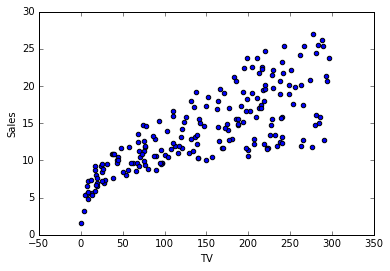

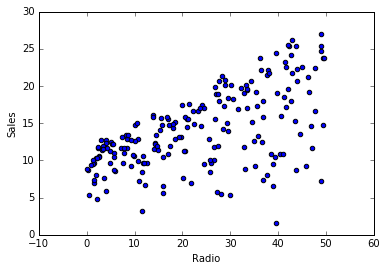

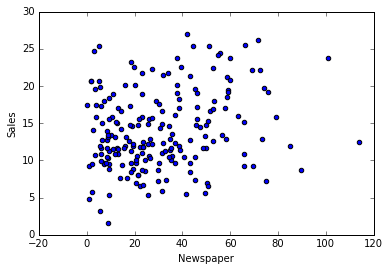

In [11]:
#2. 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df.plot.scatter(x="TV", y="Sales")
print ("TV and Sales: Relationship looks to be positive and linear which indicates that the TV data has good predictive power for Sales")
df.plot.scatter(x="Radio", y="Sales")
print ("Radio and Sales: Relationship looks positive, but not linear")
df.plot.scatter(x="Newspaper", y="Sales")
print ("Newspaper and Sales: Data points seem random, does not look like a strong relationship between Newspaper and Sales.")

In [12]:
#3. 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd

regr = linear_model.LinearRegression(fit_intercept=True)
data = df[["TV", "Sales"]]
TV = data.TV.reshape(len(data), 1)
Sales = data.Sales.reshape(len(data), 1)
# Build SLR model on TV and Sales
fit = regr.fit(TV, Sales)

print ("The linear regression coefficient for TV is %.5f" % (fit.coef_))
print("For a one unit change in TV advertising, there will be a positive change in Sales of %.4f" % (fit.coef_) )

The linear regression coefficient for TV is 0.04754
For a one unit change in TV advertising, there will be a positive change in Sales of 0.0475


The MSE for Training Data is 2.0196
The MSE for the Testing Data is 4.5944
The coefficients for TV, Radio and Newspaper are below (respectively):
[[ 0.04372003  0.1960867  -0.00325655]]


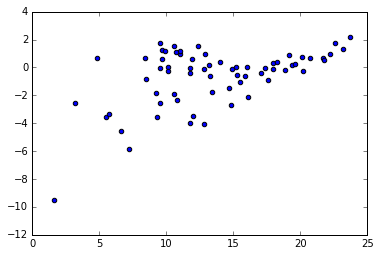

In [13]:
"""Split the data randomly into a training and test set (keep 1/3rd of the data for test).

    (4 pts) Fit an MLR on all the feature variables using the training data and evaluate the trained model on the test data using root mean squared error.
    (2 pts) Report the MSE obtained on train data. How much does this increase when you score your model on test data?
    (2 pts) Report the coefficients obtained by your model.
    (4 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

Ind = df[["TV", "Radio", "Newspaper"]]
Dep = df[["Sales"]]

#Step 1: Split the data randomly into a training and test set (keep 1/3rd of the data for test).
Ind_Train, Ind_Test, Dep_Train, Dep_Test = train_test_split(Ind, Dep, test_size=0.33)

#Step 2: Fit an MLR on all the feature variables using the training data
MLR = linear_model.LinearRegression()
MLR.fit(Ind_Train, Dep_Train)

#Test data
y_train = MLR.predict(Ind_Train)
y_test = MLR.predict(Ind_Test)

#MSE for Test and Training Data
print ("The MSE for Training Data is %.4f" % mean_squared_error(Dep_Train, y_train))
print("The MSE for the Testing Data is %.4f" % mean_squared_error(Dep_Test, y_test))

#Coefficients from Model
print ("The coefficients for TV, Radio and Newspaper are below (respectively):" )
print (MLR.coef_)

#Plot of Residuals
plt.scatter(Dep_Test, Dep_Test - y_test)


Part 4. The plot of residuals is not randomly distributed around the mean (zero) which indicates that a multiple linear regression is not the best model for this data set.


# <p style="text-align: center;">Assignment 2</p>

# Question 1: Sampling

A recent survey estimated that $30\%$ of all Europeans aged 20 to 22 have driven under the influence of drugs or alcohol, based on a simple "Yes or No" question. A similar survey is being planned for Americans. The survey designers want the  $90\%$ confidence interval to have a margin of error of at most $\pm0.09$.

(a) Find the necessary sample size needed to conduct this survey assuming that the expected percentage of "yes" answers will be very close to that obtained from the European survey?

(b) Suppose the tolerance level was kept the same but the confidence level needs to increase to $95\%$. What is the required sample size for this new specification?

(c) If one does not know where the true "$p$" may lie, one can conservatively conduct a survey assuming the worst case (in terms of required minimum sample size)  scenario of  $p = 0.5$. Redo part (b) for this "worst case" scenario.

## Part A


<p style="text-align: center;">$\hat{p}$ = 0.30</p>

<p style="text-align: center;">$\alpha = 0.10$</p>

<p style="text-align: center;">$Z_{\alpha/2} = 1.65$</p>

<p style="text-align: center;">$\epsilon = 0.09$</p>

<p style="text-align: center;">$n >= 0.3(1-0.3)(1.65/0.09)^2$</p>

<p style="text-align: center;">$n >=(0.21)(336.11)$</p>

<p style="text-align: center;">n >=70.58</p>

## Part B


<p style="text-align: center;">$\hat{p}$ = 0.30</p>

<p style="text-align: center;">$\alpha = 0.05$</p>

<p style="text-align: center;">$Z_{\alpha/2} = 1.96$</p>

<p style="text-align: center;">$\epsilon = 0.09$</p>

<p style="text-align: center;">$n >= 0.3(1-0.3)(1.96/0.09)^2$</p>

<p style="text-align: center;">$n >=(0.21)(474.27)$</p>

<p style="text-align: center;">n >=99.59</p>

## Part C


<p style="text-align: center;">$\hat{p}$ = 0.50</p>

<p style="text-align: center;">$\alpha = 0.05$</p>

<p style="text-align: center;">$Z_{\alpha/2} = 1.96$</p>

<p style="text-align: center;">$\epsilon = 0.09$</p>

<p style="text-align: center;">$n >= 0.5(1-0.5)(1.96/0.09)^2$</p>

<p style="text-align: center;">$n >=(0.25)(474.27)$</p>

<p style="text-align: center;">n >=118.57</p>